In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd.variable as Variable
import torch.optim as optim
%matplotlib inline

In [31]:
mlvts_data = pd.read_csv('/Users/adityarane/Documents/Data_Science_Workshops/household_power_consumption.txt'
                         , sep = ';'
                         ,header=0
                         ,low_memory=False
                         ,infer_datetime_format=True
                         ,parse_dates={'datetime':[0,1]}
                         ,index_col=['datetime'])
# summarize)
mlvts_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [32]:
mlvts_data.shape

(2075259, 7)

In [16]:
# mark all missing values
mlvts_data.replace('?', 'nan', inplace=True)

In [17]:
# add a column for for the remainder of sub metering
values = mlvts_data.values.astype('float32')
mlvts_data['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [20]:
mlvts_data = pd.read_csv('/Users/adityarane/Documents/Data_Science_Workshops/household_power_consumption.csv'
                      , header=0
                      , infer_datetime_format=True
                      , parse_dates=['datetime']
                      , index_col=['datetime'])
mlvts_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


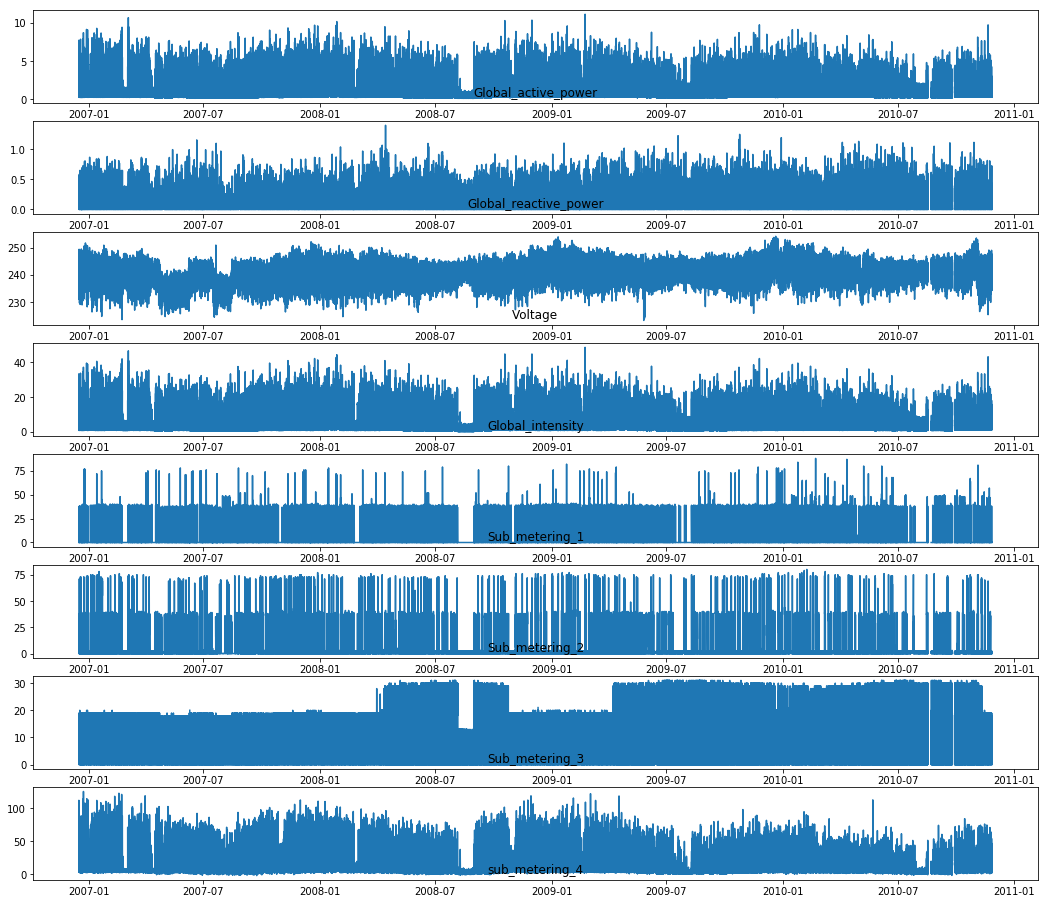

In [22]:
plt.figure(figsize=(18, 16))
plt
for i in range(len(mlvts_data.columns)):
    plt.subplot(len(mlvts_data.columns), 1, i+1)
    name = mlvts_data.columns[i]
    plt.plot(mlvts_data[name])
    plt.title(name, y=0)
plt.show()

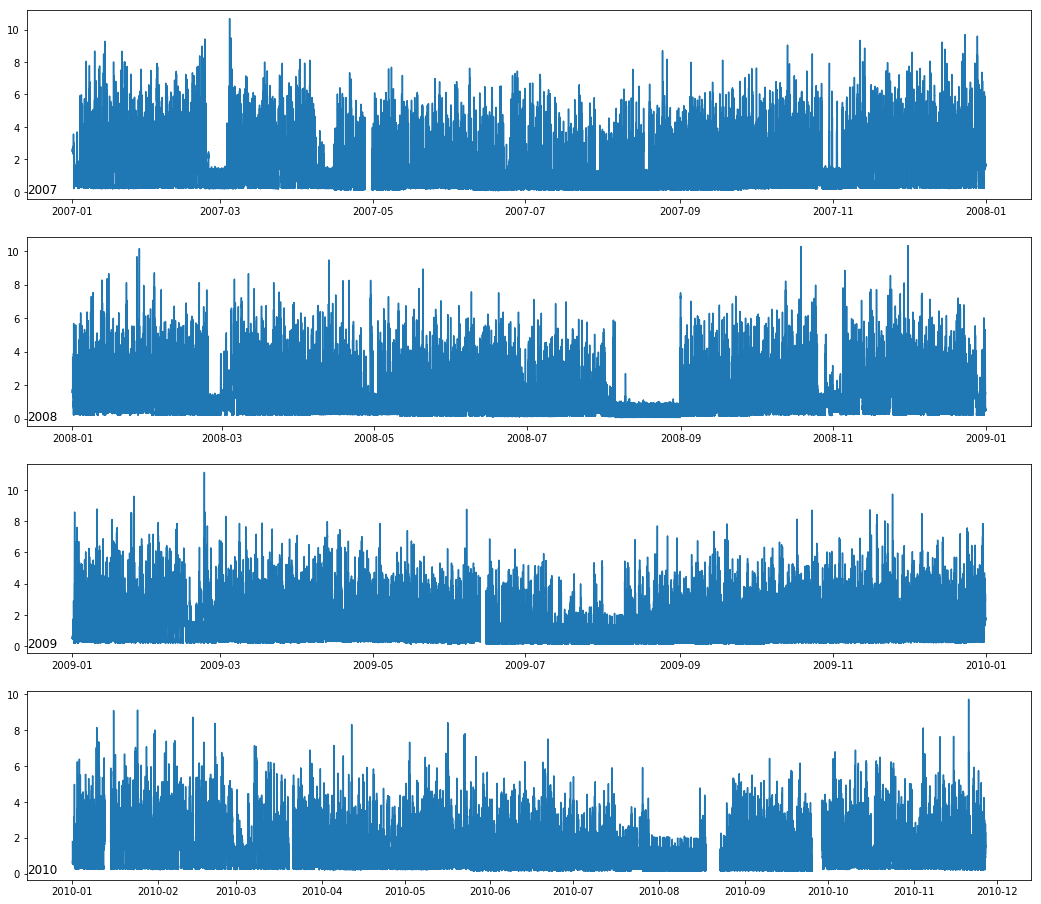

In [24]:
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(18, 16))
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = mlvts_data[str(year)]
    # plot the active power for the year
    plt.plot(result['Global_active_power'])
    # add a title to the subplot
    plt.title(str(year), y=0, loc='left')
#plt.show()

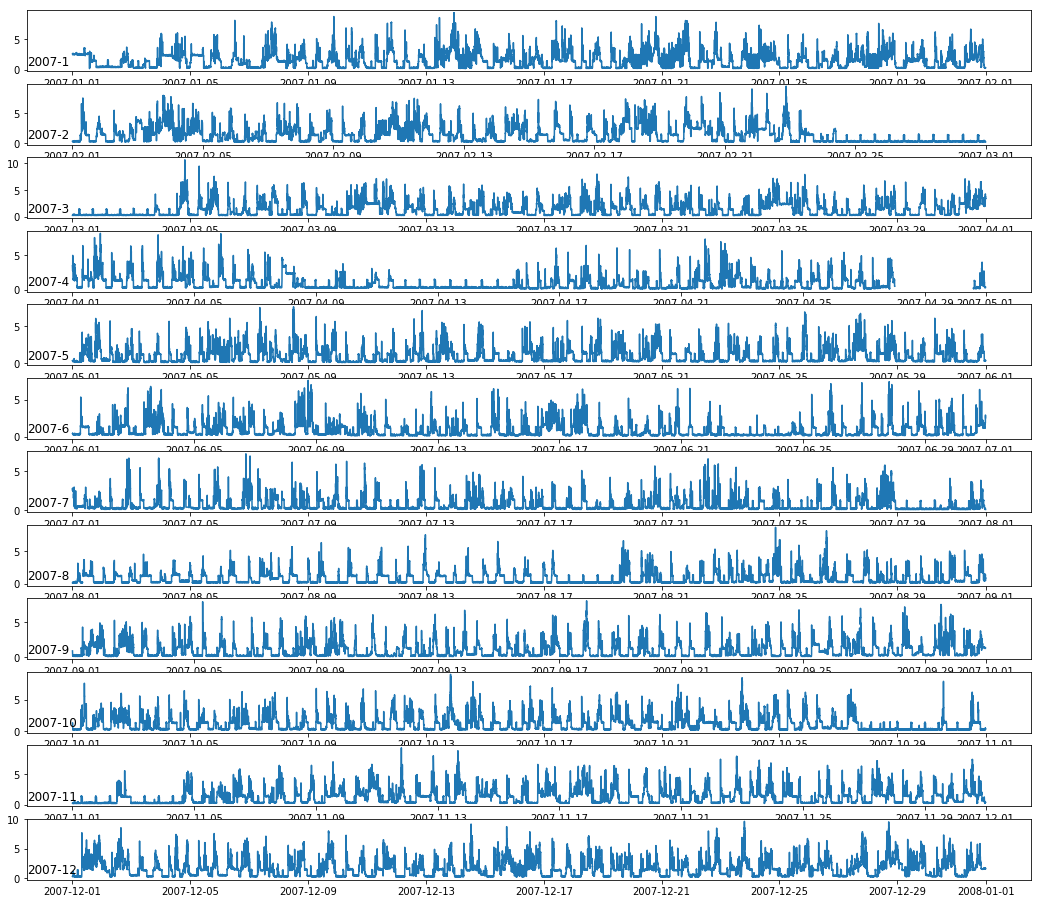

In [26]:
# plot active power for each year
months = [x for x in range(1, 13)]
plt.figure(figsize=(18, 16))
for i in range(len(months)):
    # prepare subplot
    ax = plt.subplot(len(months), 1, i+1)
    # determine the month to plot
    month = '2007-' + str(months[i])
    # get all observations for the month
    result = mlvts_data[month]
    # plot the active power for the month
    plt.plot(result['Global_active_power'])
    # add a title to the subplot
    plt.title(month, y=0, loc='left')
#pyplot.show()

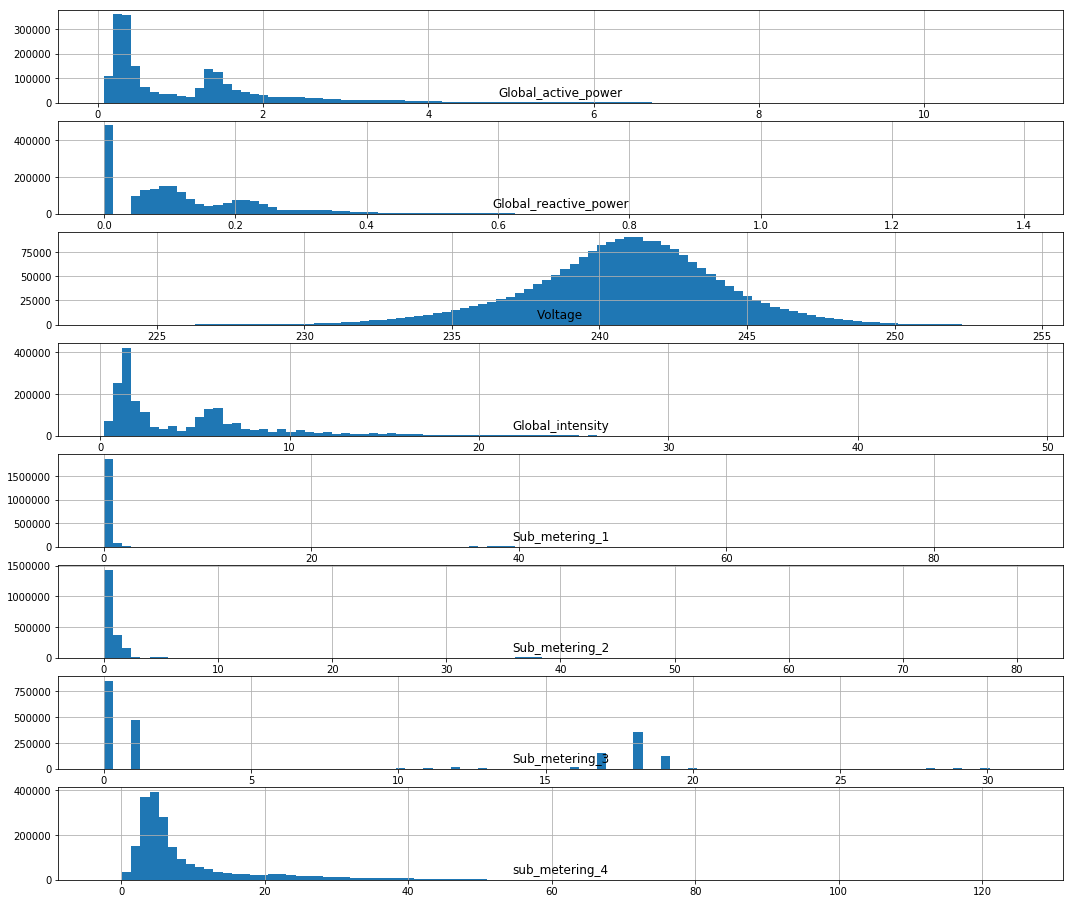

In [27]:
# histogram plot for each variable
plt.figure(figsize=(18, 16))
for i in range(len(mlvts_data.columns)):
    plt.subplot(len(mlvts_data.columns), 1, i+1)
    name = mlvts_data.columns[i]
    mlvts_data[name].hist(bins=100)
    plt.title(name, y=0)
#plt.show()

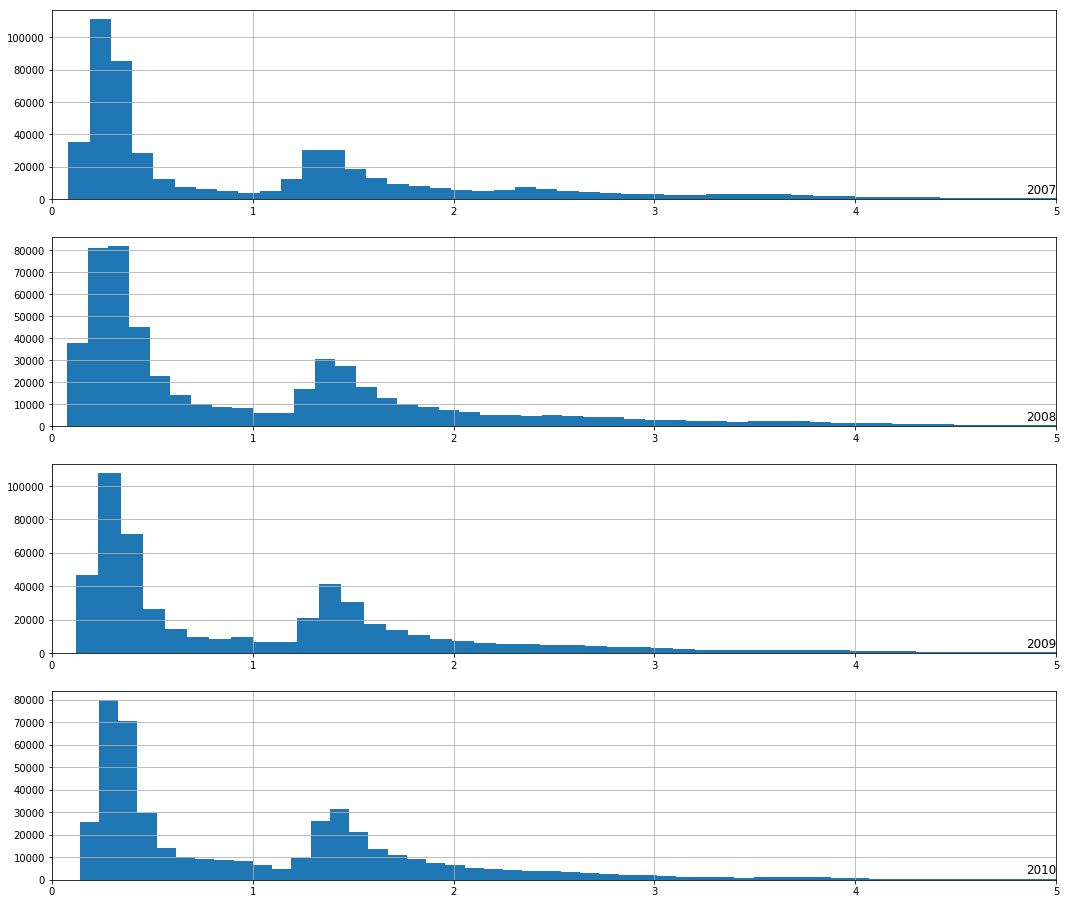

In [29]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(18, 16))
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = mlvts_data[str(year)]
    # plot the active power for the year
    result['Global_active_power'].hist(bins=100)
    # zoom in on the distribution
    ax.set_xlim(0, 5)
    # add a title to the subplot
    plt.title(str(year), y=0, loc='right')
#plt.show()

In [59]:
mlvts_data = pd.read_csv('/Users/adityarane/Documents/Data_Science_Workshops/household_power_consumption.txt'
                         , sep = ';'
                         ,header=0
                         ,low_memory=False
                         ,infer_datetime_format=True
                         ,parse_dates={'datetime':[0,1]}
                         ,index_col=['datetime'])
# summarize)
mlvts_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [62]:
# fill missing values with a value at the same time one day ago
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if np.isnan(values[row, col],casting='safe'):
                values[row, col] = values[row - one_day, col]



In [63]:
# mark all missing values
mlvts_data.replace('?', np.nan, inplace=True)
# make dataset numeric
mlvts_data = mlvts_data.astype('float32')
#missing values imputation
fill_missing(mlvts_data.values)
# add a column for for the remainder of sub metering
values = mlvts_data.values
mlvts_data['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
mlvts_data.to_csv('/Users/adityarane/Documents/Data_Science_Workshops/household_power_consumption.csv')

In [64]:
# load the new file
dataset = pd.read_csv('/Users/adityarane/Documents/Data_Science_Workshops/household_power_consumption.csv'
                   , header=0
                   , infer_datetime_format=True
                   , parse_dates=['datetime']
                   , index_col=['datetime'])
# resample data to daily
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()
# summarize
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('/Users/adityarane/Documents/Data_Science_Workshops/household_power_consumption_days.csv')

(1442, 8)
            Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime                                                                       
2006-12-16            5180.8             0.0           546.0          4926.0   
2006-12-17           14398.6          2033.0          4187.0         13341.0   
2006-12-18            9247.2          1063.0          2621.0         14018.0   
2006-12-19            7094.0           839.0          7602.0          6197.0   
2006-12-20            9313

In [93]:
# load the new file
dataset = pd.read_csv('/Users/adityarane/Documents/Data_Science_Workshops/household_power_consumption_days.csv'
                   , header=0
                   , infer_datetime_format=True
                   , parse_dates=['datetime']
                   , index_col=['datetime'])

In [94]:
dataset.shape

(1442, 8)

In [95]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011


In [96]:
if torch.cuda.is_available():
    print('CUDA available, training on gpu')
    device = torch.device('cuda')
else:
    print('CUDA NOT available, training on CPU')
    device = torch.device('cpu')

CUDA NOT available, training on CPU


In [97]:
saved_index = dataset.index
saved_columns = dataset.columns

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [99]:
dataset= pd.DataFrame(dataset , index = saved_index , columns = saved_columns)

In [100]:
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,0.211996,0.000000,0.000000,0.211006,0.000000,0.045090,0.162013,0.208124
2006-12-17,0.694252,0.499028,0.959730,0.695226,0.181875,0.345776,0.536762,0.582824
2006-12-18,0.431901,0.331329,0.966003,0.424618,0.095098,0.216451,0.566912,0.281286
2006-12-19,0.313037,0.302994,0.970210,0.311508,0.075058,0.627798,0.218615,0.182056
2006-12-20,0.436748,0.329256,0.971902,0.428075,0.000000,0.218680,0.568916,0.304112
...,...,...,...,...,...,...,...,...
2010-11-22,0.396021,0.280566,0.960333,0.393793,0.434335,0.174251,0.394033,0.245881
2010-11-23,0.293436,0.267759,0.962407,0.292450,0.167382,0.037823,0.281585,0.236250
2010-11-24,0.341791,0.254727,0.959423,0.335956,0.098050,0.235197,0.487018,0.192785


In [91]:
#dataset = scaler.inverse_transform(dataset)

In [92]:
#dataset= pd.DataFrame(dataset , index = saved_index , columns = saved_columns)
#dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011


In [101]:
from datetime import datetime, timedelta
t1 = timedelta(days=1)
t2 = timedelta(days=2)
t3 = timedelta(days=3)
t4 = timedelta(days=4)
t5 = timedelta(days=5)
t6 = timedelta(days=6)
t7 = timedelta(days=7)

w1 = timedelta(weeks=1)
w2 = timedelta(weeks=2)
w3 = timedelta(weeks=3)
w4 = timedelta(weeks=4)
w5 = timedelta(weeks=5)

m1 = timedelta(weeks=4)
m3 = timedelta(weeks=12)
m6 = timedelta(weeks=24)
m9 = timedelta(weeks=36)
m12 = timedelta(weeks=52)

#dataset['t1'] = dataset.index - t1
#dataset['t2'] = dataset.index - t2
#dataset['t3'] = dataset.index - t3
#dataset['t4'] = dataset.index - t4
#dataset['t5'] = dataset.index - t5
#dataset['t6'] = dataset.index - t6
#dataset['t7'] = dataset.index - t7

#dataset['m1'] = dataset.index - m1
#dataset['m3'] = dataset.index - m3
#dataset['m6'] = dataset.index - m6
#dataset['m9'] = dataset.index - m9
#dataset['m12'] = dataset.index - m12

#dataset['w1'] = dataset.index - w1
#dataset['w2'] = dataset.index - w2
#dataset['w3'] = dataset.index - w3
#dataset['w4'] = dataset.index - w4
#dataset['w5'] = dataset.index - w5

In [102]:
type(dataset.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [103]:
dataset.loc[dataset.index[0]].values[1:]

array([0.        , 0.        , 0.21100628, 0.        , 0.04509043,
       0.16201291, 0.20812382])

In [104]:
dataset.loc[dataset.index[0]].values[:1]

array([0.21199632])

In [105]:
def create_sequence(idx):

    idx = pd._libs.tslibs.timestamps.Timestamp(idx)
    seq = np.zeros((18,8))

    idx_t1 = idx - t1
    idx_t2 = idx - t2
    idx_t3 = idx - t3
    idx_t4 = idx - t4
    idx_t5 = idx - t5
    idx_t6 = idx - t6
    idx_t7 = idx - t7
    idx_m1 = idx - m1
    idx_m3 = idx - m3
    idx_m6 = idx - m6
    idx_m9 = idx - m9
    idx_m12 = idx - m12
    idx_w1 = idx - w1
    idx_w2 = idx - w2
    idx_w3 = idx - w3
    idx_w4 = idx - w4
    idx_w5 = idx - w5
    
    label = dataset.loc[idx].values[:1] #Get 1st vale as label
    seq[0] = dataset.loc[idx]
    #seq[0][0] = 0
    seq[1] = dataset.loc[idx_t1]
    seq[2] = dataset.loc[idx_t2]
    seq[3] = dataset.loc[idx_t3]
    seq[4] = dataset.loc[idx_t4]
    seq[5] = dataset.loc[idx_t5]
    seq[6] = dataset.loc[idx_t6]
    seq[7] = dataset.loc[idx_t7]
    seq[8] = dataset.loc[idx_m1]
    seq[9] = dataset.loc[idx_m3]
    seq[10] = dataset.loc[idx_m6]
    seq[11] = dataset.loc[idx_m9]
    seq[12] = dataset.loc[idx_m12]
    seq[13] = dataset.loc[idx_w1]
    seq[14] = dataset.loc[idx_w2]
    seq[15] = dataset.loc[idx_w3]
    seq[16] = dataset.loc[idx_w4]
    seq[17] = dataset.loc[idx_w5]
    
    return seq , label

returned_seq , returned_label = create_sequence('2007-12-16 00:00:00')

In [106]:
returned_label

array([0.5553551])

In [107]:
dataset.index.max()
#dataset.index.min()

Timestamp('2010-11-26 00:00:00')

In [108]:
pd._libs.tslibs.timestamps.Timestamp('2010-11-26 00:00:00') - pd._libs.tslibs.timestamps.Timestamp('2007-12-16 00:00:00')

Timedelta('1076 days 00:00:00')

In [109]:
train_features = np.zeros((1077 , 18, 8))
train_labels = np.zeros((1077,1))
train_idx = 0

In [110]:
for idx in dataset.index :
    if idx >= pd._libs.tslibs.timestamps.Timestamp('2007-12-16 00:00:00'):
        returned_seq , returned_label = create_sequence(idx)
        train_features[train_idx] =  returned_seq
        train_labels[train_idx] = returned_label
        train_idx+=1

In [111]:
print('train_features.shape :{}'.format(train_features.shape))
print('train_labels.shape :{}'.format(train_labels.shape))

train_features.shape :(1077, 18, 8)
train_labels.shape :(1077, 1)


In [112]:
train_tensor = torch.tensor(train_features , dtype = torch.float64)
train_labels_tensor = torch.tensor(train_labels , dtype = torch.float64)

In [117]:
output_size = 1
input_size = 8
hidden_size = 8
num_layers = 2
batch_size = 1
drop_out_probability = 0.25
seq_length = 8


class TimeSeriesRNN(nn.Module):
    def __init__(self , input_size , hidden_size , num_layers , output_size, seq_length):
        super(TimeSeriesRNN ,self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size
        self.seq_length = seq_length
        
        #Input sequence of embedded word vectors
        self.lstm1 = nn.LSTM(input_size = input_size,
                             hidden_size = hidden_size ,
                             num_layers = num_layers, 
                             batch_first = True )
        
        # Inputs to hidden layer linear transformation
        self.fc1 = nn.Linear(in_features = input_size , out_features = hidden_size)
        
        #Droput layer before output
        self.dropout = nn.Dropout(p = drop_out_probability)
        
        # Output layer, 10 units - one for each digit
        #self.out = nn.Linear(in_features = int(hidden_size/2) , out_features = output_size)
        self.out = nn.Linear(in_features = hidden_size , out_features = output_size)
        
    def _init_hidden(self,batch_size):
        hidden = torch.zeros((self.num_layers, batch_size , self.hidden_size) , dtype = torch.float64)
        c_0 = torch.zeros((self.num_layers, batch_size , self.hidden_size) , dtype = torch.float64)
        return hidden.to(device) , c_0.to(device)
        #return hidden.cpu() , c_0.cpu()
        
    def forward(self,x):
        
        #create initial hidden layer of zeros and intial state of zeros
        hidden , c_0 = self._init_hidden(batch_size)
        
        # Pass the input tensor through LSTM
        lstm_out ,hidden = self.lstm1(x,(hidden,c_0))
        #print('lstm_out :{}'.format(lstm_out.shape))
        
        #Transpose tensor before feeding into Linear layer
        #lstm_out = lstm_out.transpose(dim0 = 0, dim1 = 1)
        #Pass output og LSTM through Fully connected layer
        #x = self.fc1(lstm_out[-1]) #pass only last output to fully connected layer
        #print('x :{}'.format(x.shape))
        #x = F.relu(x)
        
        #Dropout layer
        #x = self.dropout(x)
        #x = F.relu(x)
        
        #Output layer
        #x = self.out(x)
        #x = F.relu(x)
        
        return lstm_out
    
timeseriesrnn = TimeSeriesRNN(input_size = input_size ,
                            hidden_size = hidden_size ,
                            num_layers = num_layers,
                            output_size = output_size ,
                            seq_length = seq_length)
timeseriesrnn.double()
timeseriesrnn.to(device)
print(timeseriesrnn)

TimeSeriesRNN(
  (lstm1): LSTM(8, 8, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=8, out_features=8, bias=True)
  (dropout): Dropout(p=0.25)
  (out): Linear(in_features=8, out_features=1, bias=True)
)


In [121]:
input_tensor  = train_tensor[0]
print(input_tensor.shape)
input_tensor = input_tensor.unsqueeze(0)
pred = timeseriesrnn(input_tensor)
print(pred.shape)

torch.Size([18, 8])
torch.Size([1, 18, 8])


In [122]:
pred

tensor([[[0.3906, 0.2678, 0.7582, 0.3984, 0.2041, 0.2166, 0.4420, 0.2329],
         [0.4599, 0.2581, 0.9465, 0.4553, 0.2500, 0.2470, 0.5333, 0.2816],
         [0.3738, 0.3345, 0.9689, 0.3709, 0.1882, 0.1812, 0.4390, 0.2432],
         [0.3643, 0.2557, 0.9697, 0.3557, 0.1458, 0.1509, 0.4381, 0.2591],
         [0.3075, 0.2553, 0.9694, 0.3051, 0.1098, 0.1198, 0.3739, 0.2326],
         [0.3371, 0.2357, 0.9707, 0.3319, 0.1223, 0.1202, 0.4101, 0.2404],
         [0.3843, 0.2751, 0.9825, 0.3706, 0.1729, 0.1866, 0.4599, 0.2641],
         [0.3350, 0.2703, 0.9656, 0.3362, 0.1323, 0.1163, 0.4005, 0.2569],
         [0.3709, 0.2664, 0.9757, 0.3667, 0.1562, 0.1562, 0.4293, 0.2808],
         [0.2543, 0.4578, 0.9799, 0.2561, 0.1487, 0.1465, 0.2461, 0.1842],
         [0.2088, 0.3982, 0.9715, 0.2175, 0.1038, 0.1089, 0.2433, 0.1498],
         [0.3106, 0.2423, 0.9742, 0.3040, 0.1084, 0.1258, 0.3862, 0.2320],
         [0.4031, 0.2269, 0.9776, 0.3971, 0.1691, 0.1690, 0.4683, 0.2870],
         [0.4077, 0.3111,

In [120]:
epochs = 10
loss_fn = F.mse_loss
learning_rate = 0.001
optimizer = optim.RMSprop(timeseriesrnn.parameters() , lr = learning_rate)
print_every = 50

for epoch in range(0,epochs) :
    for batch in range(0 , len(train_tensor) -1 ):
        # zero the parameter gradients
    
        input_tensor  = train_tensor[batch]
        input_tensor = input_tensor.unsqueeze(0)
        
        input_label = train_tensor[batch + 1]
        input_label = input_label.unsqueeze(0)
    
        #input_label = train_labels_tensor[batch + 1]
        #input_label = input_label.unsqueeze(0)
    
        optimizer.zero_grad()
    
        # forward + backward + optimize
        pred = timeseriesrnn(input_tensor)
        loss = loss_fn(pred , input_label.unsqueeze(0))
    
        loss.backward()
        optimizer.step()
        
        if batch % print_every == 0:
            print('epoch : {} \t batch : {} \t loss : {}'.format(epoch , batch , loss.item()))
            
    print('epoch : {}\t loss : {}'.format(epoch , loss.item()))

epoch : 0 	 batch : 0 	 loss : 0.22365752499960337
epoch : 0 	 batch : 50 	 loss : 0.04326140294226382
epoch : 0 	 batch : 100 	 loss : 0.031767573454419565
epoch : 0 	 batch : 150 	 loss : 0.022451359135355356
epoch : 0 	 batch : 200 	 loss : 0.017706352728714434
epoch : 0 	 batch : 250 	 loss : 0.023162835922134126
epoch : 0 	 batch : 300 	 loss : 0.014874424334677073
epoch : 0 	 batch : 350 	 loss : 0.022172804789932665
epoch : 0 	 batch : 400 	 loss : 0.021048708408410763
epoch : 0 	 batch : 450 	 loss : 0.025670344132880028
epoch : 0 	 batch : 500 	 loss : 0.013555886025710794
epoch : 0 	 batch : 550 	 loss : 0.007870454846280076
epoch : 0 	 batch : 600 	 loss : 0.013353460317523153
epoch : 0 	 batch : 650 	 loss : 0.01631577319972049
epoch : 0 	 batch : 700 	 loss : 0.010048130188940428
epoch : 0 	 batch : 750 	 loss : 0.013674474896863666
epoch : 0 	 batch : 800 	 loss : 0.021642722039550165
epoch : 0 	 batch : 850 	 loss : 0.009983171391356148
epoch : 0 	 batch : 900 	 loss : 0

epoch : 6 	 batch : 850 	 loss : 0.007055087457984287
epoch : 6 	 batch : 900 	 loss : 0.00431493674886713
epoch : 6 	 batch : 950 	 loss : 0.007783134549920033
epoch : 6 	 batch : 1000 	 loss : 0.009032680807914962
epoch : 6 	 batch : 1050 	 loss : 0.012978462530613973
epoch : 6	 loss : 0.008194774562696511
epoch : 7 	 batch : 0 	 loss : 0.00791562887119416
epoch : 7 	 batch : 50 	 loss : 0.01565080630499652
epoch : 7 	 batch : 100 	 loss : 0.016066132382160658
epoch : 7 	 batch : 150 	 loss : 0.008932666117973241
epoch : 7 	 batch : 200 	 loss : 0.008193227828864133
epoch : 7 	 batch : 250 	 loss : 0.006086211162839699
epoch : 7 	 batch : 300 	 loss : 0.008620758987777803
epoch : 7 	 batch : 350 	 loss : 0.013947998316016764
epoch : 7 	 batch : 400 	 loss : 0.011737397279336292
epoch : 7 	 batch : 450 	 loss : 0.019155266597991088
epoch : 7 	 batch : 500 	 loss : 0.007068323909147749
epoch : 7 	 batch : 550 	 loss : 0.006437405272272277
epoch : 7 	 batch : 600 	 loss : 0.005315988465

In [123]:
timeseriesrnn(train_tensor[batch].unsqueeze(0))

tensor([[[0.3130, 0.2988, 0.7580, 0.3145, 0.1358, 0.1695, 0.3867, 0.2011],
         [0.2932, 0.2780, 0.9324, 0.2956, 0.1040, 0.1025, 0.3834, 0.1806],
         [0.3281, 0.2789, 0.9718, 0.3207, 0.1266, 0.1392, 0.4122, 0.2203],
         [0.3085, 0.2333, 0.9598, 0.3086, 0.1070, 0.0959, 0.3873, 0.2210],
         [0.2351, 0.3127, 0.9753, 0.2281, 0.0952, 0.1309, 0.2842, 0.1511],
         [0.2938, 0.2294, 0.9631, 0.2873, 0.1014, 0.0908, 0.3612, 0.1987],
         [0.3692, 0.3330, 0.9867, 0.3532, 0.1915, 0.2012, 0.4478, 0.2263],
         [0.2985, 0.3631, 0.9720, 0.2994, 0.1487, 0.1183, 0.3777, 0.2050],
         [0.2628, 0.3846, 0.9732, 0.2664, 0.1281, 0.1127, 0.3351, 0.1792],
         [0.2792, 0.4169, 0.9800, 0.2790, 0.1544, 0.1405, 0.3681, 0.1733],
         [0.2577, 0.4183, 0.9760, 0.2608, 0.1427, 0.1220, 0.3601, 0.1548],
         [0.3075, 0.3533, 0.9757, 0.3038, 0.1519, 0.1279, 0.4229, 0.1950],
         [0.3240, 0.3043, 0.9729, 0.3189, 0.1474, 0.1260, 0.4384, 0.2149],
         [0.3110, 0.3839,

In [124]:
input_label.item()

ValueError: only one element tensors can be converted to Python scalars

In [125]:
batch

1075

In [126]:
input_label[batch].unsqueeze(0)

IndexError: index 1075 is out of bounds for dimension 0 with size 1

In [127]:
loss_fn(pred , input_label.unsqueeze(0))

tensor(0.0120, dtype=torch.float64, grad_fn=<MseLossBackward>)